In [5]:
def get_times(maximum_time):

    device_times = {
        "/gpu:0":[],
        "/cpu:0":[]
    }
    matrix_sizes = range(500,50000,50)

    for size in matrix_sizes:
        print("####### Matrix size: " + str(size) + " #######")
        for device_name in device_times.keys():

            print("####### Calculating on the " + device_name + " #######")

            shape = (size,size)
            data_type = tf.float16
            with tf.device(device_name):
                r1 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                r2 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                dot_operation = tf.matmul(r2, r1)

            with tf.Session(config=tf.ConfigProto(log_device_placement=False)) as session:
                    start_time = time.time()
                    result = session.run(dot_operation)
                    time_taken = time.time() - start_time
                    #print(result)
                    device_times[device_name].append(time_taken)
            print("Time taken:", time_taken)

            if time_taken > maximum_time:
                return device_times, matrix_sizes

In [2]:
from __future__ import print_function
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import os

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [6]:
device_times, matrix_sizes = get_times(30) # Change the number to specify maximum cut-off compute time (in seconds) after which the comparison script is terminated and results displayed.
print(device_times)
gpu_times = device_times["/gpu:0"]
cpu_times = device_times["/cpu:0"]

####### Matrix size: 500 #######
####### Calculating on the /gpu:0 #######
Time taken: 0.02100396156311035
####### Calculating on the /cpu:0 #######
Time taken: 0.27002954483032227
####### Matrix size: 550 #######
####### Calculating on the /gpu:0 #######
Time taken: 0.031252384185791016
####### Calculating on the /cpu:0 #######
Time taken: 0.37193751335144043
####### Matrix size: 600 #######
####### Calculating on the /gpu:0 #######
Time taken: 0.020004987716674805
####### Calculating on the /cpu:0 #######
Time taken: 0.47844600677490234
####### Matrix size: 650 #######
####### Calculating on the /gpu:0 #######
Time taken: 0.015624523162841797
####### Calculating on the /cpu:0 #######
Time taken: 0.605971097946167
####### Matrix size: 700 #######
####### Calculating on the /gpu:0 #######
Time taken: 0.02300715446472168
####### Calculating on the /cpu:0 #######
Time taken: 0.7345378398895264
####### Matrix size: 750 #######
####### Calculating on the /gpu:0 #######
Time taken: 0.015626

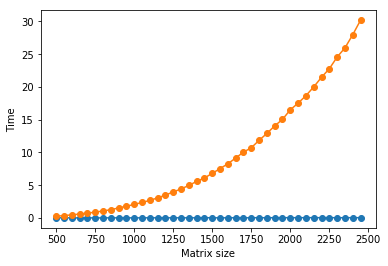

In [7]:
plt.plot(matrix_sizes[:len(gpu_times)], gpu_times, 'o-')
plt.plot(matrix_sizes[:len(cpu_times)], cpu_times, 'o-')
plt.ylabel('Time')
plt.xlabel('Matrix size')
plt.show()